# 25 Middlesex 

This is the only State House district that is entirely contained within Cambridge. It was unchanged in the 2021 redistricting, so we can effectively compare historical voting patterns. This seat has been occupied by Marjorie Decker since 2012. The below data only looks at voters who are either registered for the Democratic Party or unaffliated as there has not been a Republican primary for state rep in the past 10 years.

## Turnout by Age

In [1]:
# %matplotlib ipympl
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ma_voter_analysis.plotting import *
from ma_voter_analysis.processing import *

In [12]:
YEARS = [2012, 2014, 2016, 2018, 2020, 2022]
challenger_years = [2012, 2014, 2016, 2018]

cur_registered_df = load_voter_list(
    "../../data/cambridge/general/raw/49VOT_285911.txt", date_for_age="2024-09-06"
)
cur_registered_df['Date of Registration'] = pd.to_datetime(cur_registered_df['Date of Registration'])

In [7]:


primary = (
    pd.read_csv("../../data/cambridge/sept-primaries-compiled.csv",low_memory=False)
    .rename({"Unnamed: 0": "year"}, axis=1)
    .set_index(["year", "Voter ID Number"])
)
general = pd.read_csv("../../data/cambridge/general-vote-history.csv").set_index(["year", "Voter ID Number"])
general = general[general["State Representative District"] == 142]
primary = primary[primary["State Representative District"] == 142]
primary = primary[primary["Party Affiliation"].isin(["D", "U"])]
general = general[general["Party Affiliation"].isin(["D", "U"])]

/tmp/ipykernel_94822/415005568.py:6: DtypeWarning: Columns (14,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  general = pd.read_csv("../../data/cambridge/general-vote-history.csv").set_index(["year", "Voter ID Number"])


## 25th Middlesex




### Shift in Electorate Age


Since Decker's initial eleciton in 2012 there has been a significant decrease in the age of the electorate. In 2012 voters under 40 were 21% of all voters. In 2022 they were 46%.


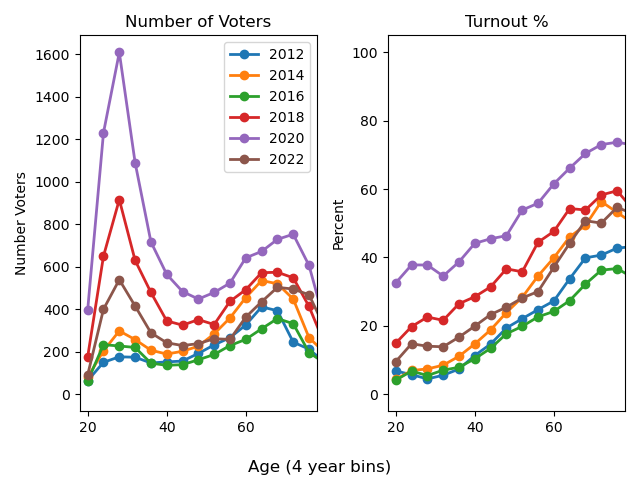

In [16]:

age_bin = 4
age_grouped = turnout_by_year_key(primary, "age", age_bin)
fig, axs = plt.subplots(1,2,)
lw = 2
for year in YEARS:
    mid_points = age_grouped.loc[year]['mid_points']
    # if year in challenger_years:
    #     lw = 4
    # else:
    #     lw = 2
    axs[0].plot(mid_points, age_grouped.loc[year]['voted'], marker='o', label=year,linewidth=lw)
    axs[1].plot(mid_points, age_grouped.loc[year]['turnout']*100, marker='o', label=year,linewidth=lw)
    # (age_grouping.loc[year]['turnout']*100).plot(marker='o', label=year, ax=axs[1])
axs[0].legend()
axs[1].set_title("Turnout %")
axs[0].set_title("Number of Voters")
axs[0].set_ylabel("Number Voters")
axs[1].set_ylabel("Percent")
axs[0].set_xlim([18, 78])
axs[1].set_xlim([18, 78])
fig.supxlabel(f"Age ({age_bin} year bins)")
plt.tight_layout()

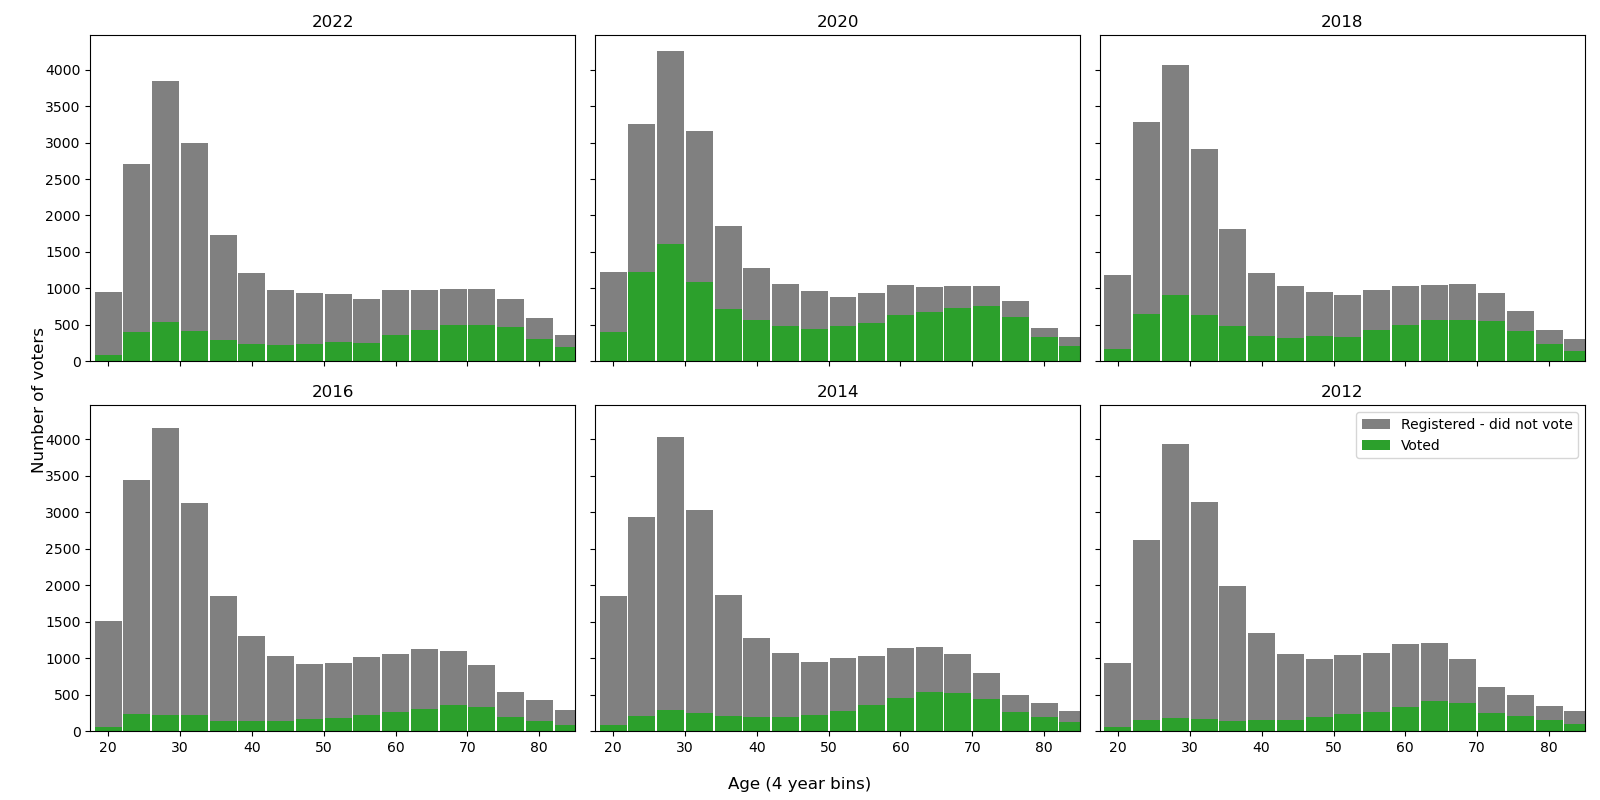

In [17]:
fig, axs = multi_year_bar(
    age_grouped, turnout_bar_graph, years_per_row=3, figsize=(16, 8)
)
fig.supxlabel(f"Age ({age_bin} year bins)")
fig.supylabel("Number of voters")
axs[-1][-1].legend()
axs[-1, -1].set_xlim([17.5, 85])
plt.tight_layout();

### Never had opportunity to vote for Decker

As of October 28th 2023 there were 2343 people registered to vote in the 25th Middlesex who registered after the November 2022 elections. These people have never had an opportunity to vote for Decker. These voters skew young, with a huge majority of them being under 40.

By the September 2024 primaries we can expect this number have increased as more people move to Cambridge and register, especially given the like voter registration drives that will occur for the presidential election. For example in 2020, 2445 people registered to vote in the 25th between January 1st and 10 days before the primary.

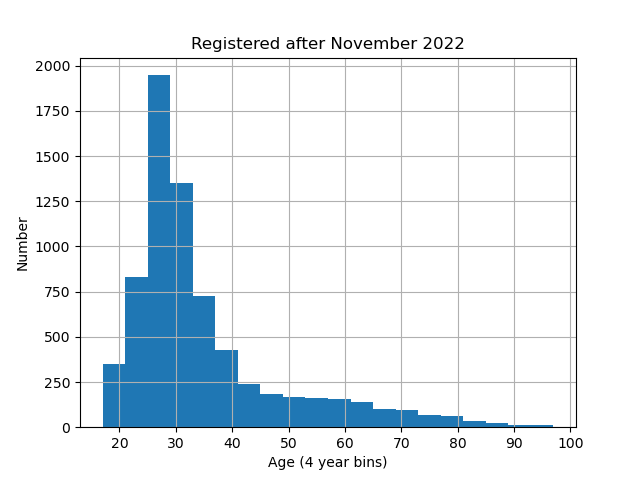

In [20]:

bins = np.arange(17, 100, age_bin)
never_decker = cur_registered_df[cur_registered_df['Date of Registration'] > pd.to_datetime("2022-11-10")]
plt.subplots()
never_decker['age'].hist(bins=bins)
plt.title("Registered after November 2022")
plt.ylabel("Number")
plt.xlabel(f"Age ({age_bin} year bins)");